In [10]:
from pathlib import Path
from numpy import log, exp
from scipy.optimize.minpack import leastsq
import pandas as pd
import os

In [11]:
# Define paths

base = os.path.basename(os.getcwd())
path = os.path.abspath(os.getcwd())

dir_data = path[0:-len(base)] + "data.csv"
df = pd.read_csv(dir_data)


In [12]:
def _exp(a, b, c, d):
 return lambda x: a * exp(b * x) + c * exp(d * x)

In [13]:
## interpolation
def interpolate(x, df, fun=_exp):
 resid = lambda p, x, y: y - fun(*p)(x)
 ls = leastsq(resid, [1.0, 1.0, 1.0, 1.0], args=(df['x'], df['y']))
 a, b, c, d = ls[0]
 y = fun(a, b, c, d)(x)
 return y

[ 3.39981418  1.00015853 -3.39981418  1.00015853]
-6.646102662428071e+24


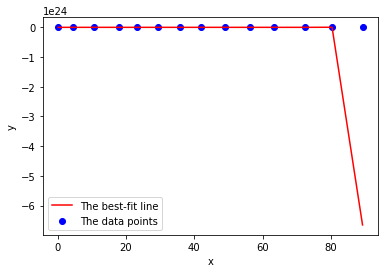

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = df["x"]

def func(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)

y = df["y"].values # Example exponential data

# Here you give the initial parameters for a,b,c which Python then iterates over
# to find the best fit
popt, pcov = curve_fit(func,x,y)

print(popt) # This contains your three best fit parameters

p1 = popt[0] # This is your a
p2 = popt[1] # This is your b
p3 = popt[2] # This is your c
p4 = popt[3] # This is your d

residuals = y - func(x,p1,p2,p3,p4)
fres = sum( (residuals**2)/func(x,p1,p2,p3,p4) ) # The chi-sqaure of your fit

print(fres)

""" Now if you need to plot, perform the code below """
curvey = func(x,p1,p2,p3,p4) # This is your y axis fit-line

plt.plot(x, curvey, 'red', label='The best-fit line')
plt.scatter(x,y, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()